<a href="https://colab.research.google.com/github/m-volnykh/Programming6/blob/main/LR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 1

## Выполнил(а): __Вольных Мария Валентиновна__

In [ ]:
!git clone https://github.com/m-volnykh/Programming6

Cloning into 'Programming6'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 682.37 KiB | 3.36 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

ONLINE SPEND
Max: 4556.93
Min: 320.25
Mean:  1905.88
Dispersion: 654249.4093217035
Standart deviation: 808.86
--------------------------------------------------------------------------------
OFFLINE SPEND
Max: 5000
Min: 500
Mean:  2843.56
Dispersion: 906860.9062170705
Standart deviation: 952.29
--------------------------------------------------------------------------------


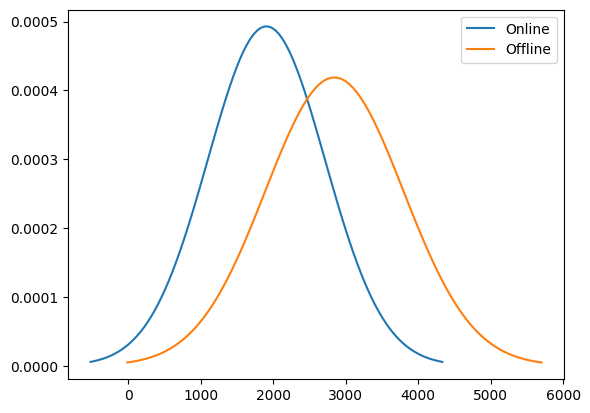

In [ ]:
data = pd.read_csv('/content/Programming6/Lab1/MarketingSpend.csv', header = 0, names = ['Date', 'Offline', 'Online'])

print('ONLINE SPEND')
print(f"Max: {data['Online'].max()}")
print(f"Min: {data['Online'].min()}")
mu_on = round(data['Online'].mean(), 2) #Среднее значение
print('Mean: ', mu_on)
print(f"Dispersion: {data['Online'].var()}") #Дисперсия
sigma_on = round(data['Online'].std(), 2) #Стандартное отклонение
print(f"Standart deviation: {sigma_on}")
print('-'*80)

print('OFFLINE SPEND')
print(f"Max: {data['Offline'].max()}")
print(f"Min: {data['Offline'].min()}")
mu_off = round(data['Offline'].mean(), 2) #Среднее значение
print('Mean: ', mu_off)
print(f"Dispersion: {data['Offline'].var()}") #Дисперсия
sigma_off = round(data['Offline'].std(), 2) #Стандартное отклонение
print(f"Standart deviation: {sigma_off}")
print('-'*80)

#Нарисовать случайное распределение величины по онлайн и офлайн в двух графиках
x = np.linspace(mu_on - 3*sigma_on, mu_on + 3*sigma_on, 100)
plt.plot(x, stats.norm.pdf(x, mu_on, sigma_on), label="Online")

x = np.linspace(mu_off - 3*sigma_off, mu_off + 3*sigma_off, 100)
plt.plot(x, stats.norm.pdf(x, mu_off, sigma_off), label="Offline")

plt.legend()
plt.show()
#print(data.describe())
#print(data.info())

In [ ]:
data1 = pd.read_csv('/content/Programming6/Lab1/Retail.csv')
data1.describe()
# количество инвойсов
print('Количество инвойсов: ',len(data1['InvoiceNo'].value_counts()))

# количество итемов в заказах
print('Количество всех итемов в заказах: ', data1['Quantity'].sum())
# топ 10 stockcodes, которых заказали наибольшее число раз
print(f"Топ-10 Stockcodes:\n{data1['StockCode'].value_counts()[:10]}")


Количество инвойсов:  16522
Количество всех итемов в заказах:  826653
Топ-10 Stockcodes:
StockCode
20725    1549
22197    1357
21212    1325
20727    1281
21931    1162
20728    1145
22086    1083
15056    1070
20724    1022
20726    1009
Name: count, dtype: int64


## Задание 1.2

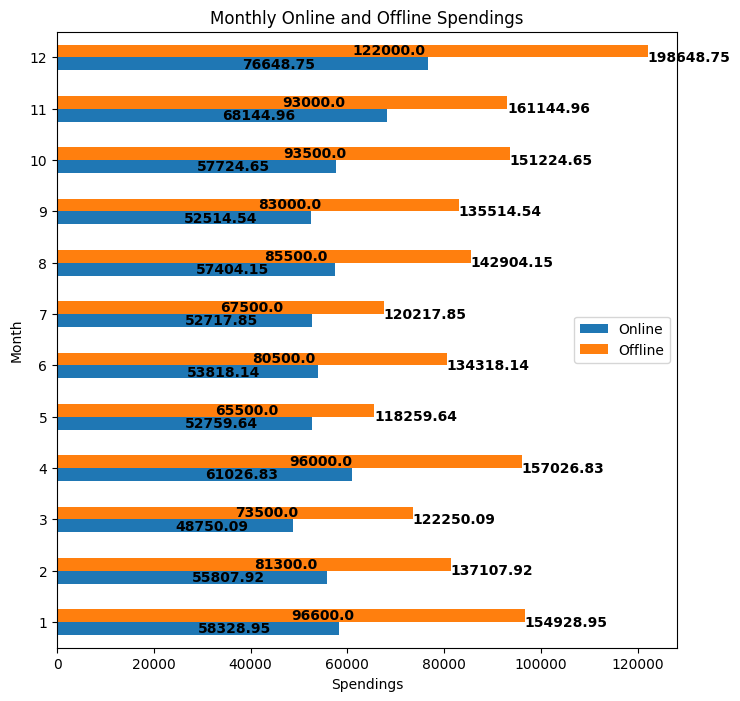

In [ ]:
#Разделение на группы по месяцам
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Month'] = data['Date'].dt.month
monthly_data = data.groupby('Month')[['Online','Offline']].sum()
#График месячных трат
monthly_data.plot(kind='barh', figsize=(8, 8))
plt.title('Monthly Online and Offline Spendings')
plt.ylabel('Month')
plt.xlabel('Spendings')
plt.legend()

for i, v in enumerate(monthly_data.values):
    plt.text(v[0]/2, i-0.13, str(v[0]), color='black', fontweight='bold', ha='left', va='center')
    plt.text(v[1]/2, i+0.13, str(v[1]), color='black', fontweight='bold', ha='left', va='center')
    plt.text(v[1], i, str(round(v[0]+v[1], 2)), color='black', fontweight='bold', ha='left', va='center')

plt.show()